In [15]:
%matplotlib inline
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.visualization import plot_bloch_multivector, plot_histogram
from qiskit.visualization import *
from math import sqrt, pi

# Loading your IBM Q account(s)
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2021-05-06 23:21:55,629: Credentials are already in use. The existing account in the session will be replaced.


## Quick Exercises 1 

### 1. Verify that |+⟩ and |−⟩ are in fact eigenstates of the X-gate.

First we need to define the |+⟩ and |−⟩ states in 2 different qubits. I will initalize the first qubit to 1 and the second to 0.

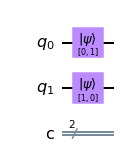

In [16]:
qCirc1 = QuantumCircuit(2, 2)
oneInit = [0, 1]
qCirc1.initialize(oneInit, 0)
zeroInit = [1, 0]
qCirc1.initialize(zeroInit, 1)
qCirc1.draw('mpl')

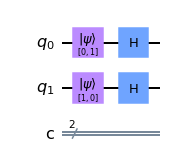

In [17]:
qCirc1.h(0)
qCirc1.h(1)
qCirc1.draw('mpl')

Now the first qubit is in the |-⟩ and the second qubit is in the |+⟩ state. We can now apply the X gates. If the |+⟩ and |−⟩ states are really eigenstates then a reapplication of the Hadamard gates and a measurement should give |0⟩ and |1⟩.

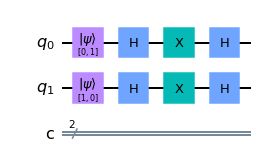

In [18]:
qCirc1.x([0,1])
qCirc1.h([0,1])
qCirc1.draw('mpl')

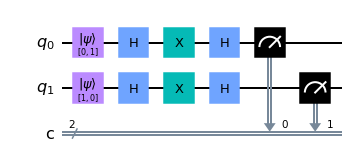

In [19]:
qCirc1.measure(0, 0)
qCirc1.measure(1, 1)
qCirc1.draw('mpl')

#### Simulating this circuit on QASM


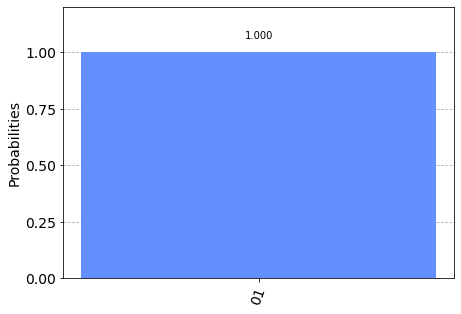

In [20]:
nativeSim = Aer.get_backend('qasm_simulator')
result = execute(qCirc1, backend = nativeSim, shots = 1024).result()
plot_histogram(result.get_counts(qCirc1))

This proves the property we were looing for

### 4. Find the eigenstates of the Y-gate, and their co-ordinates on the Bloch sphere.

## Quick Exercises 2

### 2. Show that applying the sequence of gates: HZH, to any qubit state is equivalent to applying an X-gate.

Here we will define another circuit with 1 qubit and show that a HZH transforms |0⟩ to |1⟩ and |1⟩ and |0⟩. 

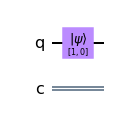

In [24]:
qCirc2 = QuantumCircuit(1, 1)
qCirc2.initialize(zeroInit, 0)
qCirc2.draw('mpl')

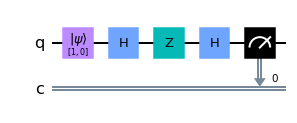

In [25]:
qCirc2.h(0)
qCirc2.z(0)
qCirc2.h(0)
qCirc2.measure(0, 0)
qCirc2.draw('mpl')

#### Simulating this circuit on QASM


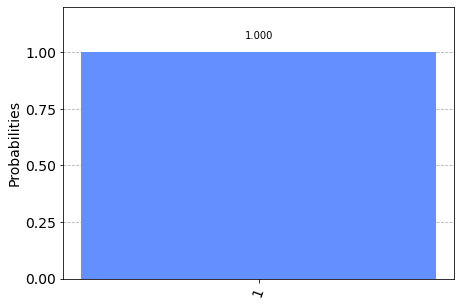

In [26]:
result2 = execute(qCirc2, backend = nativeSim, shots = 1024).result()
plot_histogram(result2.get_counts(qCirc2))

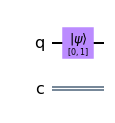

In [27]:
qCirc2 = QuantumCircuit(1, 1)
qCirc2.initialize(oneInit, 0)
qCirc2.draw('mpl')

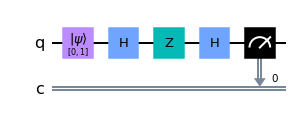

In [28]:
qCirc2.h(0)
qCirc2.z(0)
qCirc2.h(0)
qCirc2.measure(0, 0)
qCirc2.draw('mpl')

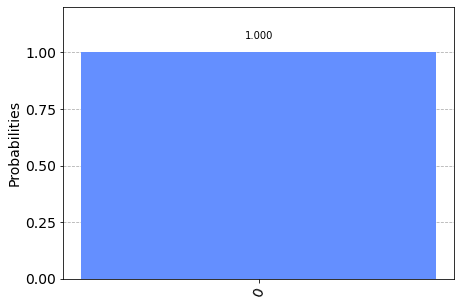

In [29]:
result2 = execute(qCirc2, backend = nativeSim, shots = 1024).result()
plot_histogram(result2.get_counts(qCirc2))

### 3. Find a combination of X, Z and H-gates that is equivalent to a Y-gate (ignoring global phase).